# Stereo Estimation

If you are working in Colab,
*   Open Files from left
*   Drag and drop `Week2_Stereo.zip` there (or click upload icon on top left). Upload can take a few minutes.
*   Unzip the file by running the following cell.



In [1]:
# !unzip Week2_Stereo.zip
# %cd Week2_Stereo

### Visualizing 3D data

Throughout the course, you will create mesh files (the ones with `ply` extension) for storing 3D data. You can visualize 3D data using a program such as MeshLab or Open3D. We recommend you to visualize `ply` files in your local machine as it is challenging in a notebook.   

**MeshLab**:
*   Install MeshLab: https://www.meshlab.net/#download
*   Visualize ply files: dragging `ply` file into an open MeshLab window should work.

**Open3D**:   
*   Install Open3D: http://www.open3d.org/docs/release/getting_started.html
*   Visualize ply file: http://www.open3d.org/docs/latest/tutorial/Basic/file_io.html#Mesh



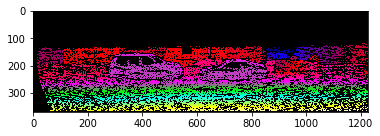

In [19]:
import matplotlib.pyplot as plt
from util import *

# load the data
leftI = load_image('data/000005_10_left_color.png')
rightI = load_image('data/000005_10_right_color.png')
dispI_gt = load_disp('data/000005_10_gt.png')
max_disp = np.max(dispI_gt)

plt.imshow(disp_to_color(dispI_gt, max_disp))

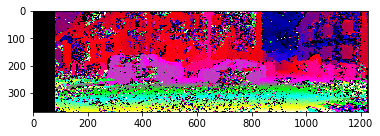

In [20]:
NUM_DISP = 80
WINDOW_SIZE = 7

# use OPenCV's StereoSGBM method to compute disparity estimation dispI_est
# between the left image and the right image
# do not forget to divide the result by 16
import cv2
stereo = cv2.StereoSGBM_create(
    numDisparities=NUM_DISP, 
    blockSize=WINDOW_SIZE)


dispI_est = stereo.compute(leftI, rightI) / 16.0
dispI_est[dispI_est <= 0] = 0
dispI_est[dispI_est > max_disp] = max_disp
# dispI_est = stereo.compute(L_gray, R_gray) / 16.0
plt.imshow(disp_to_color(dispI_est, max_disp))

In [21]:
dispI_gt.shape

(370, 1226)

In [22]:
np.min(dispI_gt)

0.0

In [23]:
### KITTI parameters ###
f = 718.86
cx = 607.19
cy = 185.22
B = 0.537

# triangulate 3D Points
all_colors = cv2.cvtColor(leftI, cv2.COLOR_BGR2RGB)
height, width = leftI.shape[:2]

def triangulate(dispI, fn):
    points = []
    colors = []

    # compute the 3D points for the given disparity image and their corresponding colors
    # by implementing triangulation (back-projection)
    for x in range(width):
        for y in range(height):
            if dispI[y][x] <= 0.0:
                continue
            z = (f * B) / dispI[y][x]
            point = (((x - cx) * z) / f,
                    ((y - cy) * z) / f,
                    z)
            points.append(point)
            colors.append(all_colors[y, x, :3])

    points = np.array(points)
    colors = np.array(colors)
    write2ply(points, colors, fn)
    
triangulate(dispI_gt, 'out/pts_gt.ply')
triangulate(dispI_est, 'out/pts_est.ply')

print('done!')

done!


Visualize the 3D point clouds using MeshLab or Open3D. Note that you might have to rotate the point cloud a little bit until you can make sense of it, especially with the estimated disparity map where there are outliers.

**Bonus**: Implement the outlier ratio metric of the KITTI to evaluate the estimation quantitatively.